In [12]:
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.append(os.pardir)
from tools.models.classifiers.adaptive_regularizer_hinge_classifier import AdaptiveRegularizerHingeClassifier
from sklearn.model_selection import train_test_split
from tools.utils.plot.boundary_plot import BinaryDataPlotter
from tools.models.classifiers.pa_hinge_classifier import PAHingeClassifier

In [481]:
N=50
OUTLIERS=[0,3]
DATA_SEED=39

In [482]:
def generate(n,outliers,seed=None):
    np.random.seed(seed)
    x_1_pos=randn(n//2)-15
    x_1_neg=randn(n//2)-5
    for i in outliers:
        x_1_pos[i]+=10
    x2= randn(n)
    y_pos=np.ones(n//2)
    y_neg=-np.ones(n//2)
    x1=np.concatenate([x_1_pos,x_1_neg])
    y=np.concatenate([y_pos,y_neg])
    X=np.concatenate([np.reshape(x1,(len(x1),1)),np.reshape(x2,(len(x2),1))],axis=1)
    p = np.random.permutation(len(X))
    X = X[p]
    y = y[p]
    return X,y

In [483]:
plotter=BinaryDataPlotter()

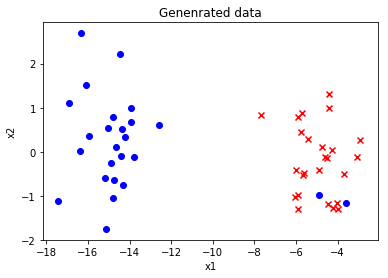

In [484]:
X,y=generate(N,OUTLIERS,DATA_SEED)
plotter.plot(X,y,"Genenrated data")

In [485]:
EPOCHS=500
BATCH_SIZE=5
SEED=10

In [486]:
arh_model=AdaptiveRegularizerHingeClassifier(gamma=0.00001,seed=SEED)
pa_model=PAHingeClassifier(gamma=0.00001,seed=SEED)

In [487]:
arh_model.fit(X,y,epochs=EPOCHS,batch_size=BATCH_SIZE)

epoch 100
epoch 200
epoch 300
epoch 400
epoch 500


In [488]:
pa_model.fit(X,y,epochs=EPOCHS,batch_size=BATCH_SIZE)

epoch 100
epoch 200
epoch 300
epoch 400
epoch 500


In [489]:
arh_model.evaluate(X,y)

0.96

In [490]:
pa_model.evaluate(X,y)

0.94

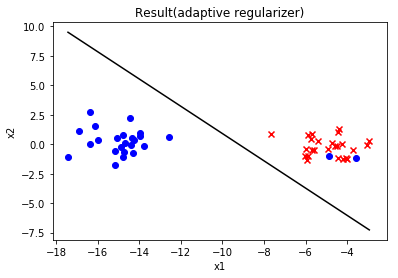

In [491]:
plotter.plot(X,y,"Result(adaptive regularizer)",arh_model.coef_)

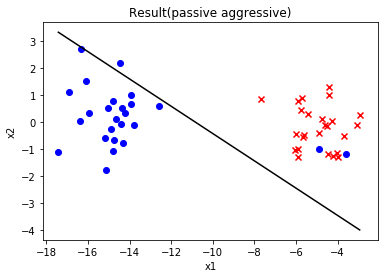

In [492]:
plotter.plot(X,y,"Result(passive aggressive)",pa_model.coef_)